In [42]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM


In [43]:
df = pd.read_csv(r'C:\Users\AmlanChatterjee\Documents\Project\TESLA_STOCK\tesla_stock_data.csv')
df.head(5)

,Date,Year,Open,High,Low,Close,Volume,Adj Close
0,2020-01-02,2020,28.299999,28.713333,28.114000,28.684000,142981500,28.684000
1,2020-01-03,2020,29.366667,30.266666,29.128000,29.534000,266677500,29.534000
2,2020-01-06,2020,29.364668,30.104000,29.333332,30.102667,151995000,30.102667
3,2020-01-07,2020,30.760000,31.441999,30.224001,31.270666,268231500,31.270666
4,2020-01-08,2020,31.580000,33.232666,31.215334,32.809334,467164500,32.809334


In [44]:
df.describe()

,Year,Open,High,Low,Close,Volume,Adj Close
count,996.000000,996.000000,996.000000,996.000000,996.000000,9.960000e+02,996.000000
mean,2021.493976,209.203720,213.956547,204.062843,209.121335,1.335149e+08,209.121335
std,1.118579,85.884404,87.588506,83.894602,85.708640,8.888939e+07,85.708640
min,2020.000000,24.980000,26.990667,23.367332,24.081333,2.940180e+07,24.081333
25%,2020.000000,159.780838,162.617496,154.389996,160.250004,7.718922e+07,160.250004
50%,2021.000000,223.989998,229.250000,218.266663,223.651665,1.074158e+08,223.651665
75%,2022.000000,263.002510,268.010002,258.120010,262.667496,1.578296e+08,262.667496
max,2023.000000,411.470001,414.496674,405.666656,409.970001,9.140820e+08,409.970001


In [45]:
null_counts = df.isnull().sum()
print(null_counts)

Date         0
Year         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


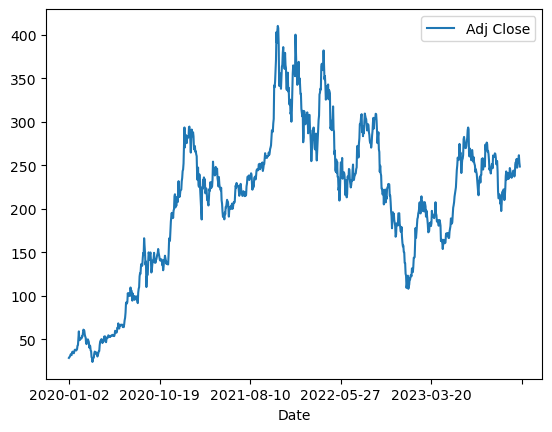

In [46]:
df.plot(x='Date', y='Adj Close')

plt.show()

In [47]:
#Set Target Variable
output_var = PD.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [48]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.008590,0.004446,0.012416,0.128385
1,0.011350,0.008454,0.015068,0.268205
2,0.011345,0.008034,0.015606,0.138573
3,0.014955,0.011487,0.017935,0.269962
4,0.017077,0.016108,0.020528,0.494826


In [49]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [50]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [76]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(40, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100


C:\Users\AmlanChatterjee\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 31401.3418
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31166.9336
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30518.7598
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29282.9941
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27476.9961
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25245.9688
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22759.2109
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20162.3594
Epoch 9/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17570.5332
Epoch 10/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15072.9570
Epoch 11/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12737.7402
Epoch 12/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10614.9248
Epoch 13/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8738.1738
Epoch 14/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7125.9150
E

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.7577
Epoch 80/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.7077
Epoch 81/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.6592
Epoch 82/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.6127
Epoch 83/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.5677
Epoch 84/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.5242
Epoch 85/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.4824
Epoch 86/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.4420
Epoch 87/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.4030
Epoch 88/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.3655
Epoch 89/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.3296
Epoch 90/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.2948
Epoch 91/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.2614
Epoch 92/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.2290
Epoch 93/100
114/114 ━━━━━━━━━━━━

In [77]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002631D57C5E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


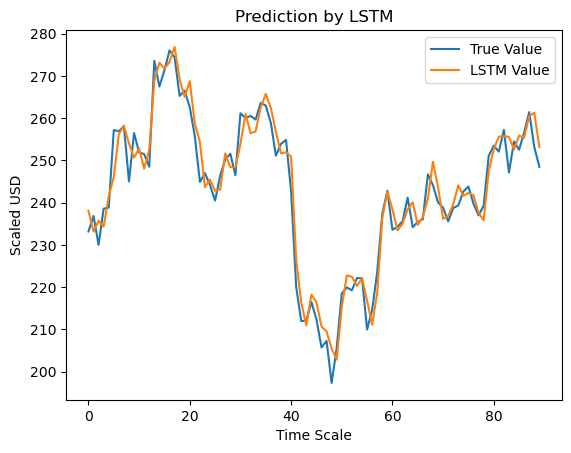

In [78]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_recall_fscore_support, confusion_matrix

# For regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


print("Accuracy Metrics:")
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))


Accuracy Metrics:
Mean Absolute Error (MAE): 3.39
Mean Squared Error (MSE): 17.14
Root Mean Squared Error (RMSE): 4.14
